# Leer datasets

In [46]:
import pandas as pd
import numpy as np

shoppers = pd.read_csv('../data/online_shoppers_intention.csv')
print(shoppers.shape)
print(shoppers.columns)
print(shoppers.dtypes)
shoppers.head()

(12330, 18)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: ob

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [47]:
# Convert 'Revenue' to integer
shoppers['Revenue'] = shoppers['Revenue'].astype(int)
# Convert 'VisitorType' to dummy variables
shoppers = pd.get_dummies(shoppers, columns=['VisitorType'], drop_first=True, dtype=int)
# Convert 'Weekend' to integer
shoppers['Weekend'] = shoppers['Weekend'].astype(int)
# Convert 'Month' to integer
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3,
    'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9,
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
shoppers['Month'] = shoppers['Month'].map(month_mapping).astype(int)

# Realizamos los clusters

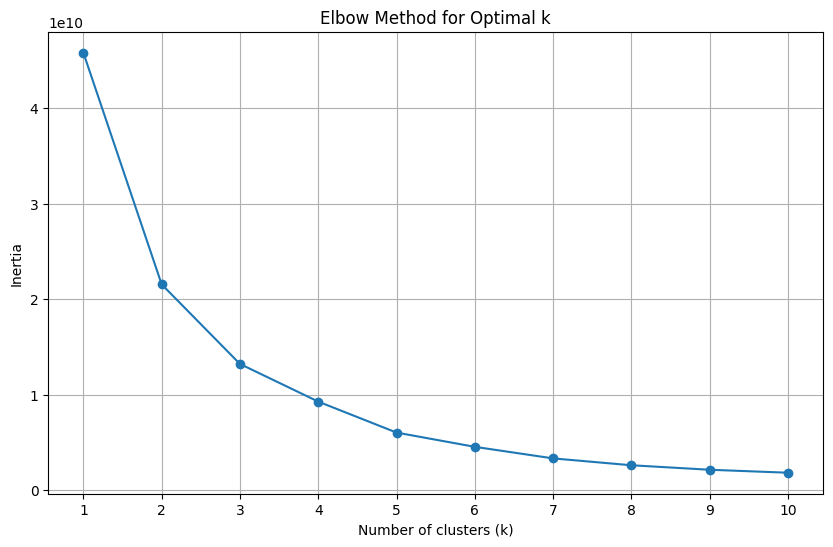

In [48]:
#hagamos metodo del codo para determinar el numero de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_k=10):
    inertia = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid()
    plt.show()
# Aplicar el método del codo
elbow_method(shoppers)

In [49]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(shoppers)
kmeans_labels = kmeans.labels_
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit(shoppers)
dbscan_labels = dbscan.labels_
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(shoppers)
gmm_labels = gmm.predict(shoppers)

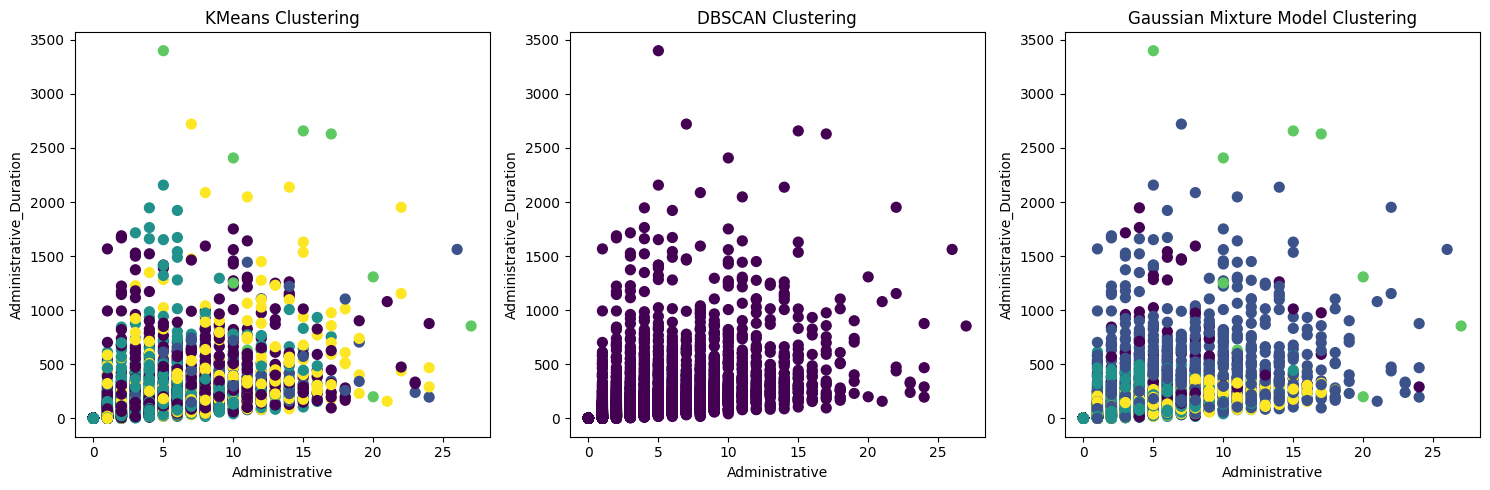

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(shoppers.iloc[:, 0], shoppers.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel(shoppers.columns[0])
plt.ylabel(shoppers.columns[1])
plt.subplot(1, 3, 2)
plt.scatter(shoppers.iloc[:, 0], shoppers.iloc[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel(shoppers.columns[0])
plt.ylabel(shoppers.columns[1])
plt.subplot(1, 3, 3)
plt.scatter(shoppers.iloc[:, 0], shoppers.iloc[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel(shoppers.columns[0])
plt.ylabel(shoppers.columns[1])
plt.tight_layout()
plt.show()

In [51]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(shoppers, kmeans_labels)
dbscan_silhouette = silhouette_score(shoppers, dbscan_labels)
gmm_silhouette = silhouette_score(shoppers, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.62
DBSCAN Silhouette Score: -0.36
Gaussian Mixture Model Silhouette Score: 0.03


# Interpretar

In [52]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [53]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(shoppers, kmeans_labels, test_size=0.2, random_state=42)


In [54]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [3.35906040e+00 1.24832841e+02 7.93288591e-01 5.49384515e+01
 4.65067114e+01 1.83995838e+03 8.42056393e-03 2.38158679e-02
 8.94648186e+00 5.42953020e-02 7.96409396e+00 2.14093960e+00
 2.34194631e+00 3.20033557e+00 3.87785235e+00 2.40939597e-01
 2.15436242e-01 3.02013423e-03 9.10067114e-01]
Cluster 1: [7.11518325e+00 2.33300203e+02 2.57068063e+00 2.32891914e+02
 2.24994764e+02 9.98730052e+03 6.04687716e-03 1.98965045e-02
 4.39406188e+00 3.35078534e-02 9.43455497e+00 2.16230366e+00
 2.32984293e+00 2.61780105e+00 3.51308901e+00 2.56544503e-01
 3.35078534e-01 5.23560209e-03 9.89528796e-01]
Cluster 2: [1.52847298e+00 4.88884969e+01 2.45798573e-01 1.33888359e+01
 1.39087172e+01 3.72511123e+02 2.91599838e-02 5.28658737e-02
 4.63581388e+00 6.56510700e-02 7.36210857e+00 2.11606819e+00
 2.36476847e+00 3.15451578e+00 4.19368879e+00 2.29113771e-01
 1.14859146e-01 8.82601862e-03 8.20336114e-01]
Cluster 3: [1.47000000e+01 1.55819631e+03 7.40000000e+00 1.03403250e+0

In [55]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.93


In [56]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 14
DBSCAN Ripper Rules: 19

Reglas para clase: 0
[[ProductRelated_Duration=1238.51-1783.17] V [ProductRelated_Duration=1783.17-2866.22] V [ProductRelated_Duration=855.47-1238.51^PageValues=2.81-18.51^Region=1^Browser=>4.0] V [ProductRelated_Duration=855.47-1238.51^PageValues=2.81-18.51^Region=1^BounceRates=0.003-0.0071] V [ProductRelated_Duration=855.47-1238.51^OperatingSystems=3^ProductRelated=45.0-74.0^BounceRates=0.023-0.057] V [ProductRelated_Duration=855.47-1238.51^OperatingSystems=3^PageValues=>18.51^ProductRelated=24.0-32.0] V [ProductRelated_Duration=855.47-1238.51^PageValues=2.81-18.51^Informational=<1.0^Browser=<2.0^Administrative_Duration=8.0-37.0] V [ProductRelated_Duration=855.47-1238.51^Administrative_Duration=70.21-121.09^ProductRelated=32.0-45.0^BounceRates=0.003-0.0071] V [ProductRelated_Duration=855.47-1238.51^PageValues=2.81-18.51^Region=1^Administrative_Duration=70.21-121.09]]

Reglas para clase: 1
[[ProductRelated_Duration=>2866.22^ProductRelat

Decision Tree Accuracy: 1.00


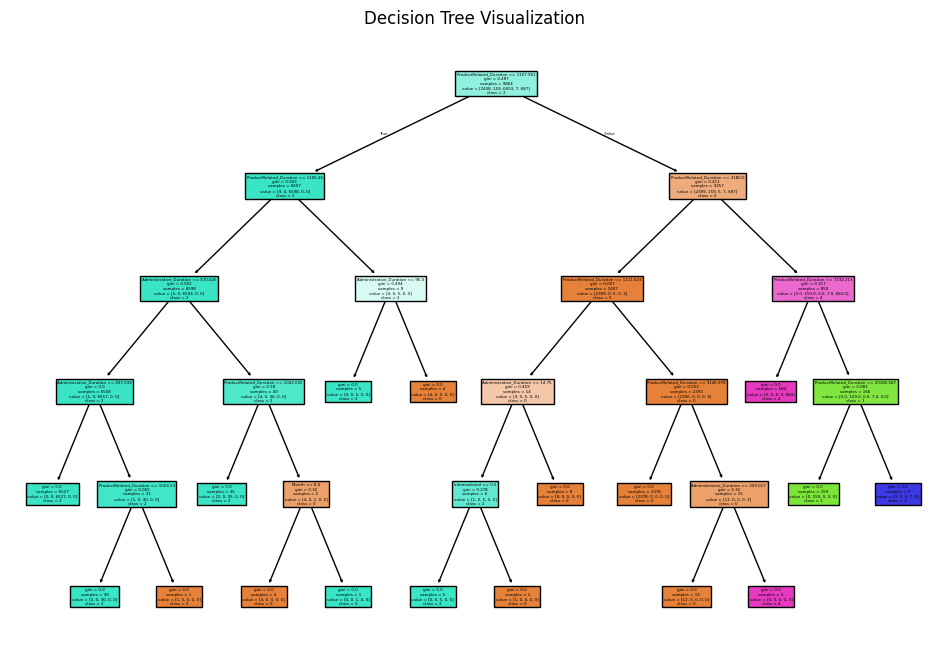

In [57]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=shoppers.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [58]:
ds = DSClassifierMultiQ(5, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=shoppers.columns.tolist())


Optimization started

Training time: 223.76s, epochs: 81

Least training loss reached: 0.024


In [59]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.936] R22: 1197.331 < ProductRelated_Duration < 2494.198
			0: 0.936	1: 0.000	2: 0.000	3: 0.000	4: 0.000	Unc: 0.064

	[0.475] R18: 31.737 < ProductRelated < 61.793
			0: 0.330	1: 0.000	2: 0.037	3: 0.000	4: 0.316	Unc: 0.316

	[0.466] R28: ExitRates < 0.010
			0: 0.355	1: 0.000	2: 0.257	3: 0.000	4: 0.002	Unc: 0.386

	[0.364] R19: ProductRelated > 61.793
			0: 0.142	1: 0.395	2: 0.000	3: 0.000	4: 0.400	Unc: 0.063

	[0.363] R35: PageValues > 18.299
			0: 0.231	1: 0.000	2: 0.201	3: 0.000	4: 0.138	Unc: 0.430

	[0.360] R26: 0.022 < BounceRates < 0.054
			0: 0.296	1: 0.000	2: 0.143	3: 0.000	4: 0.000	Unc: 0.561

	[0.325] R1: 0.079 < Administrative < 2.303
			0: 0.210	1: 0.000	2: 0.202	3: 0.000	4: 0.093	Unc: 0.496

Most important rules for class 1

	[0.609] R19: ProductRelated > 61.793
			0: 0.142	1: 0.395	2: 0.000	3: 0.000	4: 0.400	Unc: 0.063

	[0.528] R23: ProductRelated_Duration > 2494.198
			0: 0.079	1: 0.285	2: 0.000	3: 0.000	4: 0.616	Unc: 0.020

	[0.39

In [60]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.93


## DBSCAN

In [61]:
#dividir los datos en entrenamiento y prueba
n_clusters = len(np.unique(dbscan_labels))
max_label = np.max(dbscan_labels)
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(shoppers, dbscan_labels, test_size=0.2, random_state=42)


In [62]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 1.00


In [63]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 1
DBSCAN Ripper Rules: 1

Reglas para clase: 0
[[Month=2^OperatingSystems=3^ProductRelated_Duration=<39.71^Browser=<2.0]]

Reglas para clase: 1
[[ExitRates=>0.1^Month=3^OperatingSystems=2^Region=1^TrafficType=<2.0^Browser=<2.0]]

Reglas para clase: 2
[[ExitRates=>0.1^Month=3^Region=3^OperatingSystems=3^TrafficType=<2.0^ProductRelated=<3.0^Weekend=0]]

Reglas para clase: 3
[[ExitRates=>0.1^OperatingSystems=1^Month=5^Region=1^TrafficType=2.0-3.0^ProductRelated_Duration=<39.71]]

Reglas para clase: 4
[[ExitRates=>0.1^Month=5^TrafficType=<2.0^Region=1^OperatingSystems=2^ProductRelated=<3.0]]

Reglas para clase: 5
[[ExitRates=>0.1^Region=4^TrafficType=2.0-3.0^OperatingSystems=1^ProductRelated_Duration=<39.71]]

Reglas para clase: 6
[[ExitRates=>0.1^TrafficType=2.0-3.0^OperatingSystems=2^Region=1^Month=5^ProductRelated=<3.0^Browser=<2.0]]

Reglas para clase: 7
[[OperatingSystems=8^ProductRelated_Duration=<39.71^Month=12]]

Reglas para clase: 8
[[BounceRates=<0.003] V [Mo

Decision Tree Accuracy: 0.99


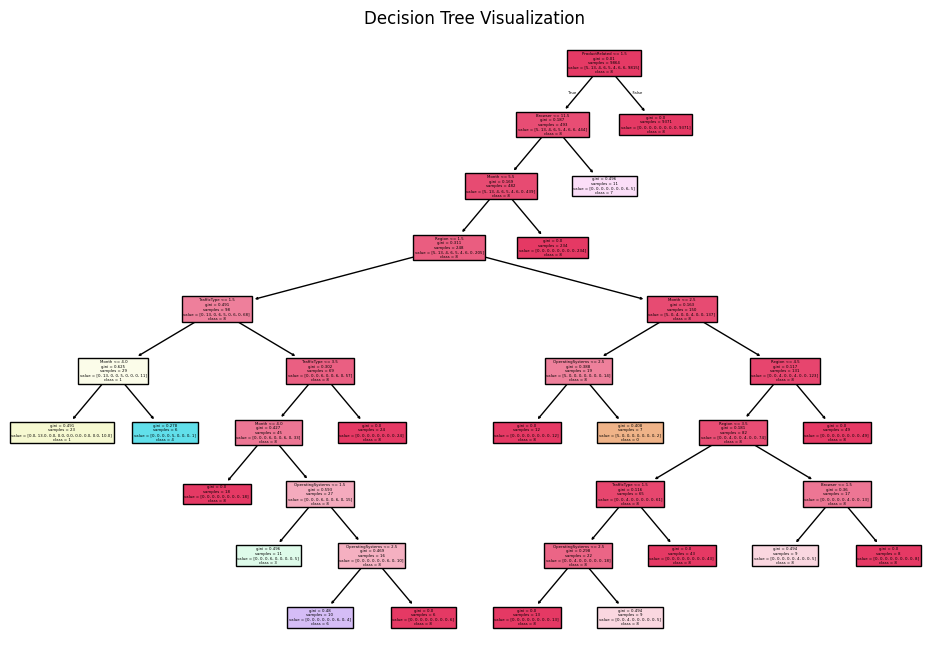

In [64]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=shoppers.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [65]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=shoppers.columns.tolist())


Optimization started

Training time: 344.25s, epochs: 119

Least training loss reached: 0.001


In [66]:
ds.print_most_important_rules(threshold=0.001)



Most important rules for class 0

	[0.304] R16: ProductRelated < 1.681
			0: 0.098	1: 0.164	2: 0.099	3: 0.100	4: 0.109	5: 0.094	6: 0.110	7: 0.165	8: 0.002	Unc: 0.059

	[0.204] R67: VisitorType_Other = 1.0
			0: 0.048	1: 0.056	2: 0.047	3: 0.047	4: 0.050	5: 0.046	6: 0.048	7: 0.521	8: 0.006	Unc: 0.131

	[0.108] R8: Informational < -0.351
			0: 0.058	1: 0.017	2: 0.029	3: 0.012	4: 0.048	5: 0.003	6: 0.024	7: 0.006	8: 0.002	Unc: 0.800

	[0.082] R12: Informational_Duration < -59.647
			0: 0.034	1: 0.039	2: 0.042	3: 0.010	4: 0.008	5: 0.032	6: 0.003	7: 0.030	8: 0.003	Unc: 0.800

	[0.080] R4: Administrative_Duration < -38.616
			0: 0.032	1: 0.020	2: 0.027	3: 0.036	4: 0.005	5: 0.021	6: 0.034	7: 0.008	8: 0.016	Unc: 0.800

	[0.076] R39: SpecialDay = 0.6
			0: 0.029	1: 0.005	2: 0.001	3: 0.026	4: 0.022	5: 0.037	6: 0.015	7: 0.040	8: 0.026	Unc: 0.800

	[0.070] R48: 2.121 < OperatingSystems < 2.735
			0: 0.024	1: 0.027	2: 0.026	3: 0.003	4: 0.019	5: 0.028	6: 0.038	7: 0.007	8: 0.028	Unc: 0.800

	[0.062] 

In [67]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 1.00


## GMM

In [68]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(shoppers, gmm_labels, test_size=0.2, random_state=42)


In [69]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.89


In [70]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 45
DBSCAN Ripper Rules: 107

Reglas para clase: 0
[[VisitorType_Returning_Visitor=0^Revenue=1^VisitorType_Other=0] V [VisitorType_Returning_Visitor=0^Informational_Duration=>71.21^VisitorType_Other=0] V [VisitorType_Returning_Visitor=0^Informational=1.0-2.0^Revenue=0] V [VisitorType_Returning_Visitor=0^PageValues=>18.51^VisitorType_Other=0] V [VisitorType_Returning_Visitor=0^Administrative_Duration=>225.24^PageValues=2.81-18.51] V [VisitorType_Returning_Visitor=0^Informational=>2.0] V [VisitorType_Returning_Visitor=0^Administrative=4.0-7.0^PageValues=2.81-18.51] V [Informational_Duration=>71.21^Month=5^SpecialDay=0.4^Informational=>2.0] V [VisitorType_Returning_Visitor=0^Month=10^ExitRates=0.012-0.016] V [Administrative_Duration=>225.24^Month=5^SpecialDay=0.6] V [Informational_Duration=>71.21^Month=5^SpecialDay=0.8] V [Informational_Duration=>71.21^SpecialDay=0.6^Administrative=>7.0] V [VisitorType_Returning_Visitor=0^PageValues=2.81-18.51^Revenue=0] V [BounceRates

Decision Tree Accuracy: 0.98


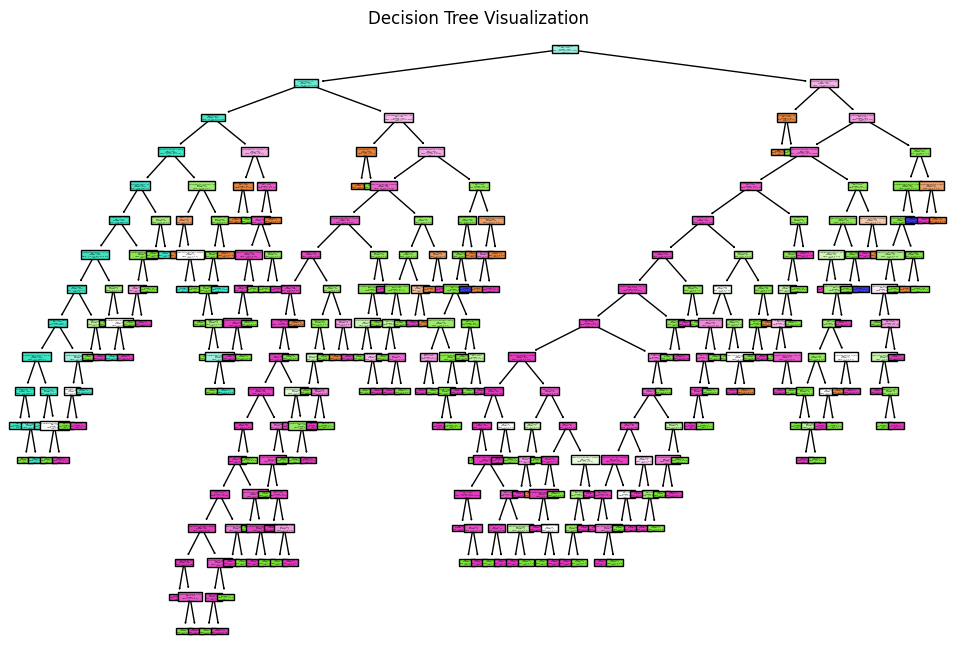

In [71]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=shoppers.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [72]:
ds = DSClassifierMultiQ(5, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=shoppers.columns.tolist())


Optimization started

Training time: 172.22s, epochs: 58

Least training loss reached: 0.022


In [73]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.898] R68: VisitorType_Returning_Visitor = 0.0
			0: 0.821	1: 0.000	2: 0.161	3: 0.000	4: 0.000	Unc: 0.018

	[0.622] R41: SpecialDay = 1.0
			0: 0.387	1: 0.000	2: 0.288	3: 0.000	4: 0.324	Unc: 0.000

	[0.613] R65: Revenue = 1.0
			0: 0.376	1: 0.289	2: 0.000	3: 0.000	4: 0.335	Unc: 0.000

	[0.562] R35: PageValues > 18.299
			0: 0.316	1: 0.323	2: 0.000	3: 0.000	4: 0.360	Unc: 0.000

	[0.561] R10: 0.503 < Informational < 1.358
			0: 0.315	1: 0.321	2: 0.000	3: 0.000	4: 0.361	Unc: 0.003

	[0.560] R15: Informational_Duration > 127.772
			0: 0.319	1: 0.633	2: 0.000	3: 0.033	4: 0.000	Unc: 0.015

	[0.528] R11: Informational > 1.358
			0: 0.279	1: 0.441	2: 0.000	3: 0.000	4: 0.280	Unc: 0.000

	[0.500] R34: 5.833 < PageValues < 18.299
			0: 0.250	1: 0.321	2: 0.000	3: 0.000	4: 0.429	Unc: 0.000

	[0.483] R7: Administrative_Duration > 200.831
			0: 0.272	1: 0.567	2: 0.000	3: 0.016	4: 0.002	Unc: 0.142

	[0.393] R14: 34.062 < Informational_Duration < 127.772
			0: 0.2

In [74]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.93
